# Day 08. Exercise 02
# Multiclass classification. One-hot encoding. Random forest

## 0. Imports

In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

## 1. Preprocessing

1. Read the file [`checker-submits.csv`](https://drive.google.com/file/d/14voc4fNJZiLEFaZyd8nEG-lQt5JjatYw/view?usp=sharing).
2. Create a dataframe `df` with the columns: `uid`, `labname`, `numTrials`, `hour`, `dayofweek` where `hour` is extracted from the `timestamp` as well as the `dayofweek` (`0` is Monday, `6` is Sunday). We will try to predict the day of the week having data about which user made a commit for which lab at which hour and which try it was.
3. Using `OneHotEncoder()` transform your categorical features, delete from the dataframe the initial columns.
4. Use `StandardScaler()` and scale your continuous features.
5. Save the dataframe as `dayofweek.csv`.
6. Before trying out different algorithms, find out the accuracy of the naive algorithms – the one that predicts everything as the most popular class.

In [116]:
df_read=pd.read_csv('../data/checker_submits.csv',parse_dates=['timestamp'])

In [117]:
df_read.info()
df_read.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1686 entries, 0 to 1685
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   uid        1686 non-null   object        
 1   labname    1686 non-null   object        
 2   numTrials  1686 non-null   int64         
 3   timestamp  1686 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 52.8+ KB


,uid,labname,numTrials,timestamp
0,user_4,project1,1,2020-04-17 05:19:02.744528
1,user_4,project1,2,2020-04-17 05:22:45.549397
2,user_4,project1,3,2020-04-17 05:34:24.422370
3,user_4,project1,4,2020-04-17 05:43:27.773992
4,user_4,project1,5,2020-04-17 05:46:32.275104


In [118]:
df=df_read.copy()
df['hour']=df['timestamp'].dt.hour
df['dayOfWeek']=df['timestamp'].dt.dayofweek
df.drop('timestamp',axis=1,inplace=True)
df.head()


,uid,labname,numTrials,hour,dayOfWeek
0,user_4,project1,1,5,4
1,user_4,project1,2,5,4
2,user_4,project1,3,5,4
3,user_4,project1,4,5,4
4,user_4,project1,5,5,4


In [119]:
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

In [120]:
X_cat = ohe.fit_transform(df[['uid', 'labname']])
X_cat

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.]])

In [121]:
cat_columns = ohe.get_feature_names_out(['uid', 'labname'])
cat_columns

array(['uid_user_0', 'uid_user_1', 'uid_user_10', 'uid_user_11',
       'uid_user_12', 'uid_user_13', 'uid_user_14', 'uid_user_15',
       'uid_user_16', 'uid_user_17', 'uid_user_18', 'uid_user_19',
       'uid_user_2', 'uid_user_20', 'uid_user_21', 'uid_user_22',
       'uid_user_23', 'uid_user_24', 'uid_user_25', 'uid_user_26',
       'uid_user_27', 'uid_user_28', 'uid_user_29', 'uid_user_3',
       'uid_user_30', 'uid_user_31', 'uid_user_4', 'uid_user_6',
       'uid_user_7', 'uid_user_8', 'labname_code_rvw', 'labname_lab02',
       'labname_lab03', 'labname_lab03s', 'labname_lab05s',
       'labname_laba04', 'labname_laba04s', 'labname_laba05',
       'labname_laba06', 'labname_laba06s', 'labname_project1'],
      dtype=object)

In [122]:
df_cat = pd.DataFrame(X_cat, columns=cat_columns)
df_cat

,uid_user_0,uid_user_1,uid_user_10,uid_user_11,uid_user_12,uid_user_13,uid_user_14,uid_user_15,uid_user_16,uid_user_17,...,labname_lab02,labname_lab03,labname_lab03s,labname_lab05s,labname_laba04,labname_laba04s,labname_laba05,labname_laba06,labname_laba06s,labname_project1
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1682,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1683,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1684,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [123]:
df_encoded = df.drop(['uid', 'labname'], axis=1).reset_index(drop=True)


In [124]:
df_encoded = pd.concat([df_encoded, df_cat], axis=1)
df_encoded

,numTrials,hour,dayOfWeek,uid_user_0,uid_user_1,uid_user_10,uid_user_11,uid_user_12,uid_user_13,uid_user_14,...,labname_lab02,labname_lab03,labname_lab03s,labname_lab05s,labname_laba04,labname_laba04s,labname_laba05,labname_laba06,labname_laba06s,labname_project1
0,1,5,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2,5,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,3,5,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4,5,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,5,5,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681,9,20,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1682,6,20,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1683,7,20,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1684,8,20,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [125]:
X_num = df_encoded[['hour', 'numTrials']]

In [126]:
scaler = StandardScaler()
X_num_scaled = scaler.fit_transform(X_num)
X_num_scaled

array([[-2.5623525 , -0.78866744],
       [-2.5623525 , -0.75676424],
       [-2.5623525 , -0.72486105],
       ...,
       [ 0.94538241, -0.59724826],
       [ 0.94538241, -0.56534507],
       [ 0.94538241, -0.53344187]])

In [127]:
df_num_scaled = pd.DataFrame(X_num_scaled, columns=['hour_scaled', 'numTrials_scaled'])
df_num_scaled

,hour_scaled,numTrials_scaled
0,-2.562352,-0.788667
1,-2.562352,-0.756764
2,-2.562352,-0.724861
3,-2.562352,-0.692958
4,-2.562352,-0.661055
...,...,...
1681,0.945382,-0.533442
1682,0.945382,-0.629151
1683,0.945382,-0.597248
1684,0.945382,-0.565345


In [128]:
df_final = pd.concat([df_num_scaled, df_cat], axis=1)
df_final.insert(0, 'dayOfWeek', df_encoded['dayOfWeek'])
df_final

,dayOfWeek,hour_scaled,numTrials_scaled,uid_user_0,uid_user_1,uid_user_10,uid_user_11,uid_user_12,uid_user_13,uid_user_14,...,labname_lab02,labname_lab03,labname_lab03s,labname_lab05s,labname_laba04,labname_laba04s,labname_laba05,labname_laba06,labname_laba06s,labname_project1
0,4,-2.562352,-0.788667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,4,-2.562352,-0.756764,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,4,-2.562352,-0.724861,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4,-2.562352,-0.692958,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,4,-2.562352,-0.661055,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681,3,0.945382,-0.533442,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1682,3,0.945382,-0.629151,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1683,3,0.945382,-0.597248,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1684,3,0.945382,-0.565345,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [129]:
df_final.to_csv('../data/dayofweek.csv', index=False)

In [130]:
most_common = df_final['dayOfWeek'].mode()[0]
y_pred_naive = [most_common] * len(df_final)
y_true = df_final['dayOfWeek']
accuracy_naive = accuracy_score(y_true, y_pred_naive)
print(f'Naive baseline accuracy: {accuracy_naive * 100:.2f}%')

Naive baseline accuracy: 23.49%


## 2. Algorithms

### a. Logreg

1. Train logistic regression, for the baseline model use `random_state=21`, `fit_intercept=False`. 
2. Calculate the accuracy.
3. Write a function that draws the plot (`barh`) taking coefficients of any trained models, names of the features and the number of `top-n` most important features to display.
4. Draw a plot (`barh`) for the baseline model with top-10 most important features (absolute value) for the trained model.
5. Remember that it is a multiclass classification and `coef_` returns a matrix, to calculate importance for a feature you need to sum all the individual feature importances for all the target values.

In [131]:
LRmodel=LogisticRegression(random_state=21, fit_intercept=False)

In [132]:
X_LR=df_final.drop('dayOfWeek', axis=1)
Y_LR=df_final['dayOfWeek']

In [133]:
LRmodel.fit(X_LR,Y_LR)

LogisticRegression(fit_intercept=False, random_state=21)

In [134]:
LR_predict=LRmodel.predict(X_LR)

In [135]:
accuracy_lr = accuracy_score(y_true, LR_predict)
print(f'Accuracy of Logical Regression: {accuracy_lr * 100:.2f}%')

Accuracy of Logical Regression: 64.06%


In [136]:
def plot_top_features(coef_matrix, feature_names, top_n=10):
    """
    Строит barh-график top_n признаков по абсолютной важности.
    
    coef_matrix : np.ndarray, shape = (n_classes, n_features)
    feature_names : list of str, длина = n_features
    top_n : int — сколько признаков показать
    """
    # 1. Считаем общую важность каждого признака по всем классам
        
    if coef_matrix.ndim == 1:
        importance = np.abs(coef_matrix)
    else:
        importance = np.sum(np.abs(coef_matrix), axis=0)

    # 2. Берем индексы top-n по убыванию
    top_idx = np.argsort(importance)[-top_n:]

    # 3. Строим график
    plt.figure(figsize=(10, 6))
    plt.barh(np.array(feature_names)[top_idx], importance[top_idx])
    plt.xlabel('Суммарная важность признака (по всем классам)')
    plt.title(f'Top {top_n} most important features')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

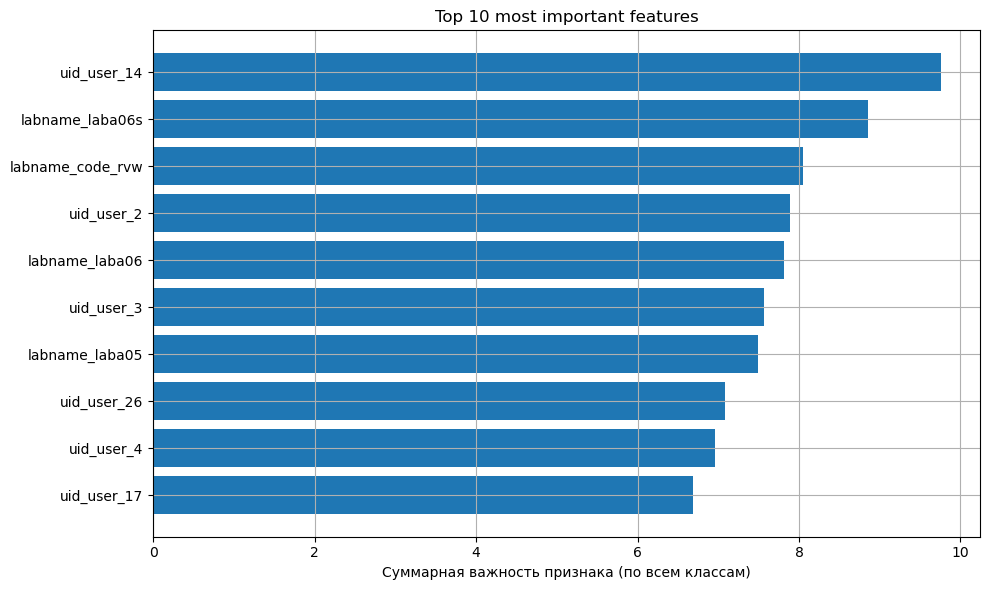

In [137]:
plot_top_features(LRmodel.coef_, X_LR.columns, top_n=10)

### b. SVC

1. Train a `SVC` model, for the baseline model use parameters `kernel='linear'`, `probability=True`, `random_state=21`. 
2. Try different kernels, calculate the accuracies.
3. Draw a plot (`barh`) for the baseline model with top-10 most important features (absolute value) for the trained model for the linear kernel *

*By default SVC uses “one vs one” strategy of the classification, thus in `coef_` it returns a matrix. To calculate importance for a feature you need to use [OneVsRestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html) over the SVC and sum all the individual feature importances for all the target values.

In [138]:
svc_model = SVC(kernel='linear', probability=True, random_state=21)
svc_model.fit(X_LR, Y_LR)
ovr_model= OneVsRestClassifier(svc_model)
ovr_model.fit(X_LR, Y_LR)

OneVsRestClassifier(estimator=SVC(kernel='linear', probability=True,
                                  random_state=21))

In [139]:
svc_predict = svc_model.predict(X_LR)
accuracy_svc = accuracy_score(y_true, svc_predict)
print(f'Accuracy of SVC: {accuracy_svc * 100:.2f}%')

Accuracy of SVC: 70.28%


In [140]:
kernels = ['linear', 'rbf', 'poly', 'sigmoid']

for k in kernels:
    model = SVC(kernel=k, probability=True, random_state=21)
    model.fit(X_LR, Y_LR)
    preds = model.predict(X_LR)
    acc = accuracy_score(y_true, preds)
    print(f'kernel={k:<8} → accuracy = {acc * 100:.2f}%')

kernel=linear   → accuracy = 70.28%
kernel=rbf      → accuracy = 85.59%
kernel=poly     → accuracy = 85.94%
kernel=sigmoid  → accuracy = 39.98%


In [141]:
for k in kernels:
    model = OneVsRestClassifier(SVC(kernel=k, probability=True, random_state=21))
    model.fit(X_LR, Y_LR)
    preds = model.predict(X_LR)
    acc = accuracy_score(y_true, preds)
    print(f'kernel={k:<8} → accuracy = {acc * 100:.2f}%')

kernel=linear   → accuracy = 61.21%
kernel=rbf      → accuracy = 86.42%
kernel=poly     → accuracy = 86.54%
kernel=sigmoid  → accuracy = 34.99%


In [142]:
coefs = np.vstack([est.coef_ for est in ovr_model.estimators_])

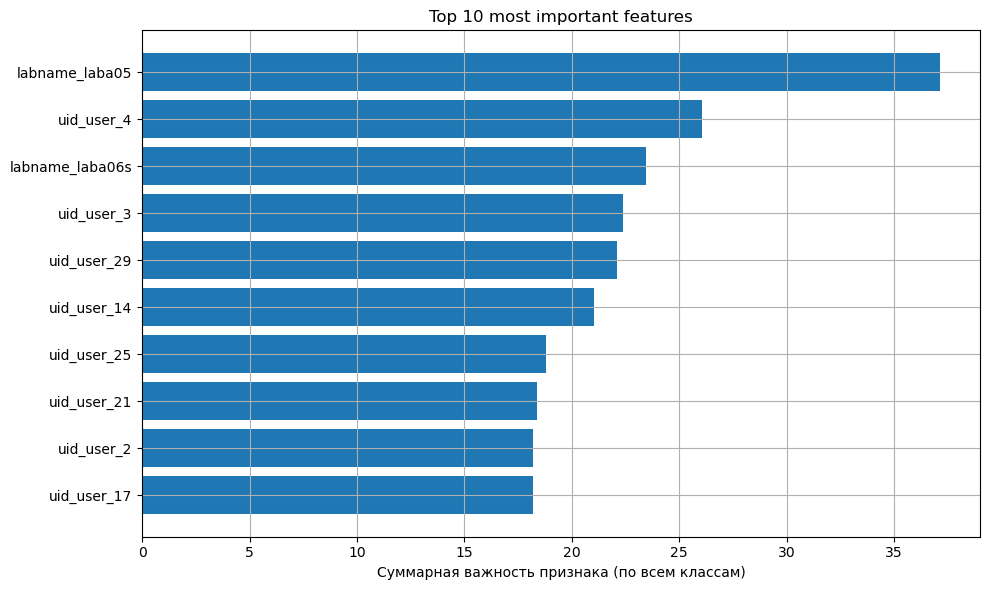

In [143]:
plot_top_features(svc_model.coef_, X_LR.columns, top_n=10)

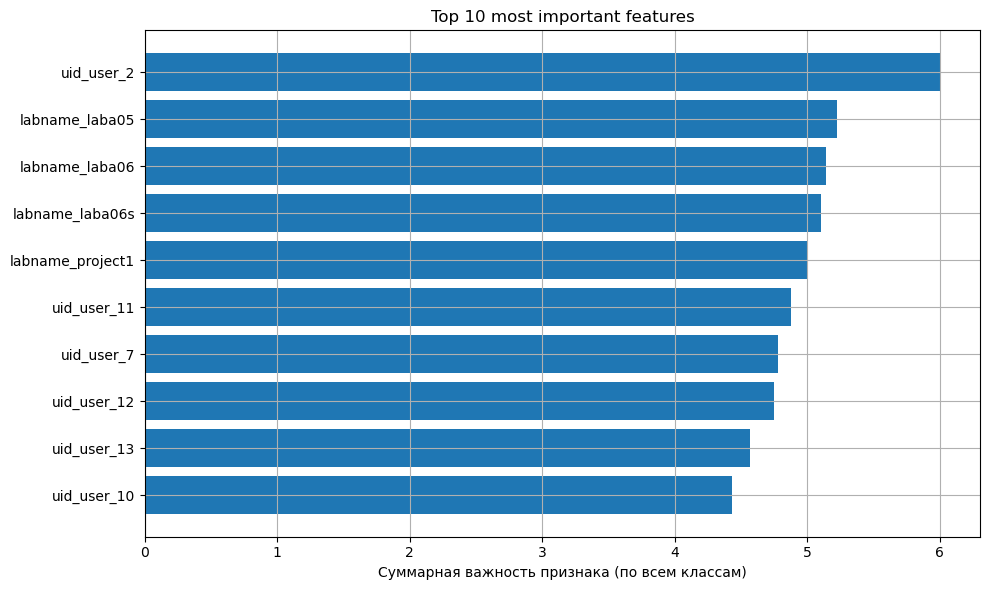

In [144]:
plot_top_features(coefs, X_LR.columns, top_n=10)

### c. Decision tree

1. Train a `DecisionTreeClassifier` using for the baseline model `max_depth=4`, `random_state=21`. 
2. Try different values of `max_depth`, calculate the accuracies.
3. Draw a plot (`barh`) for the baseline model with top-10 most important features (absolute value) for the trained model using the written function.

In [145]:
tree_model = DecisionTreeClassifier(max_depth=4, random_state=21)
tree_model.fit(X_LR, Y_LR)

DecisionTreeClassifier(max_depth=4, random_state=21)

In [146]:
tree_preds = tree_model.predict(X_LR)

In [147]:
tree_acc = accuracy_score(y_true, tree_preds)
print(f'Accuracy of Decision Tree (depth=4): {tree_acc * 100:.2f}%')

Accuracy of Decision Tree (depth=4): 55.16%


In [148]:
depths = range(1, 11)
for d in depths:
    model = DecisionTreeClassifier(max_depth=d, random_state=21)
    model.fit(X_LR, Y_LR)
    preds = model.predict(X_LR)
    acc = accuracy_score(y_true, preds)
    print(f'depth={d:<2} → accuracy = {acc * 100:.2f}%')

depth=1  → accuracy = 35.77%
depth=2  → accuracy = 43.89%
depth=3  → accuracy = 48.99%
depth=4  → accuracy = 55.16%
depth=5  → accuracy = 61.09%
depth=6  → accuracy = 66.37%
depth=7  → accuracy = 70.64%
depth=8  → accuracy = 75.03%
depth=9  → accuracy = 78.47%
depth=10 → accuracy = 81.97%


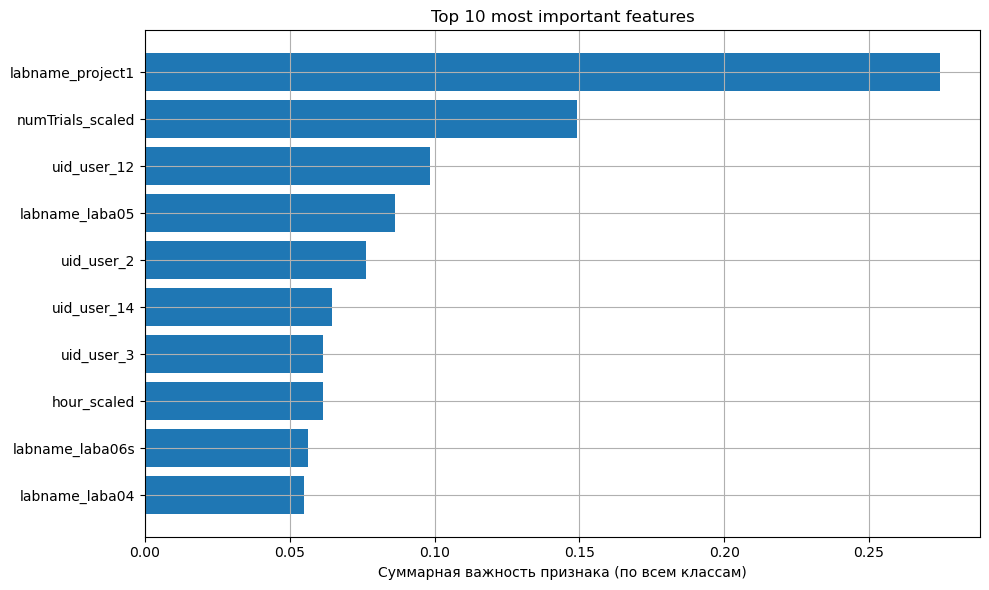

In [149]:
plot_top_features(tree_model.feature_importances_, X_LR.columns, top_n=10)

### d. Random forest

In real life forest is a set of trees. The same thing is with machine learning. Random forest is a set of individual decision trees (check the documentation for more details).

1. Train a `RandomForestClassifier` using for the baseline model parameters `n_estimators=100`, `max_depth = 25`, `random_state=21`. 
2. Try different values of `max_depth` and `n_estimators`, calculate the accuracies.
3. Draw a plot (`barh`) for the baseline model with top-10 most important features (absolute value) for the trained model using the written function.

In [151]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=25, random_state=21)
rf_model.fit(X_LR, Y_LR)

RandomForestClassifier(max_depth=25, random_state=21)

In [153]:
rf_preds = rf_model.predict(X_LR)
rf_acc = accuracy_score(y_true, rf_preds)
print(f'Accuracy of Random Forest (baseline): {rf_acc * 100:.2f}%')

Accuracy of Random Forest (baseline): 100.00%


In [157]:
estimators_list = [10, 50, 100, 150]
depth_list = [5, 10, 15, 20, 25]

for n in estimators_list:
    for d in depth_list:
        model = RandomForestClassifier(n_estimators=n, max_depth=d, random_state=21)
        model.fit(X_LR, Y_LR)
        preds = model.predict(X_LR)
        acc = accuracy_score(y_true, preds)
        print(f'n_estimators={n:<3} | max_depth={d:<2} → accuracy = {acc * 100:.2f}%')

n_estimators=10  | max_depth=5  → accuracy = 62.04%
n_estimators=10  | max_depth=10 → accuracy = 83.39%
n_estimators=10  | max_depth=15 → accuracy = 95.73%
n_estimators=10  | max_depth=20 → accuracy = 98.22%
n_estimators=10  | max_depth=25 → accuracy = 99.41%
n_estimators=50  | max_depth=5  → accuracy = 59.91%
n_estimators=50  | max_depth=10 → accuracy = 88.20%
n_estimators=50  | max_depth=15 → accuracy = 97.51%
n_estimators=50  | max_depth=20 → accuracy = 99.58%
n_estimators=50  | max_depth=25 → accuracy = 100.00%
n_estimators=100 | max_depth=5  → accuracy = 59.96%
n_estimators=100 | max_depth=10 → accuracy = 88.79%
n_estimators=100 | max_depth=15 → accuracy = 97.86%
n_estimators=100 | max_depth=20 → accuracy = 99.70%
n_estimators=100 | max_depth=25 → accuracy = 100.00%
n_estimators=150 | max_depth=5  → accuracy = 58.90%
n_estimators=150 | max_depth=10 → accuracy = 88.49%
n_estimators=150 | max_depth=15 → accuracy = 98.04%
n_estimators=150 | max_depth=20 → accuracy = 99.70%
n_estimato

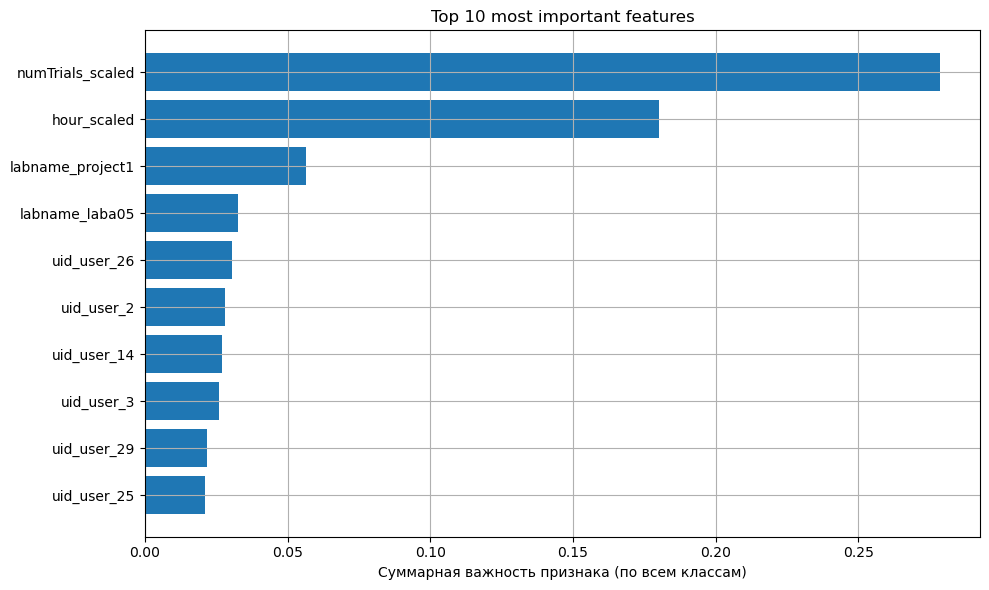

In [155]:
plot_top_features(rf_model.feature_importances_, X_LR.columns, top_n=10)